In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prices = pd.read_csv('stock_px.csv', index_col = [0], usecols = [0, 2, 5, 8, 9])
volume = pd.read_csv('volume.csv', index_col = [0], usecols=[0,2,5,9])
prices = prices[5443 : 5450]
volume = volume[5443 : 5448]

# 数据规整化方面的话题

## 时间序列以及截面对齐

In [3]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06 00:00:00,379.74,64.64,1165.24,71.15
2011-09-07 00:00:00,383.93,65.43,1198.62,73.65
2011-09-08 00:00:00,384.14,64.95,1185.90,72.82
2011-09-09 00:00:00,377.48,63.64,1154.23,71.01
2011-09-12 00:00:00,379.94,63.59,1162.27,71.84
2011-09-13 00:00:00,384.62,63.61,1172.87,71.65
2011-09-14 00:00:00,389.30,63.73,1188.68,72.64


In [4]:
volume

,AAPL,JNJ,XOM
2011-09-06 00:00:00,18173500.0,15848300.0,25416300.0
2011-09-07 00:00:00,12492000.0,10759700.0,23108400.0
2011-09-08 00:00:00,14839800.0,15551500.0,22434800.0
2011-09-09 00:00:00,20171900.0,17008200.0,27969100.0
2011-09-12 00:00:00,16697300.0,13448200.0,26205800.0


In [5]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06 00:00:00,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07 00:00:00,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08 00:00:00,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09 00:00:00,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12 00:00:00,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13 00:00:00,NaN,NaN,NaN,NaN
2011-09-14 00:00:00,NaN,NaN,NaN,NaN


In [6]:
vwap = (prices * volume).sum() / volume.sum()

In [7]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [8]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [9]:
prices.align(volume, join = 'inner')

(                       AAPL    JNJ    XOM
 2011-09-06 00:00:00  379.74  64.64  71.15
 2011-09-07 00:00:00  383.93  65.43  73.65
 2011-09-08 00:00:00  384.14  64.95  72.82
 2011-09-09 00:00:00  377.48  63.64  71.01
 2011-09-12 00:00:00  379.94  63.59  71.84,
                            AAPL         JNJ         XOM
 2011-09-06 00:00:00  18173500.0  15848300.0  25416300.0
 2011-09-07 00:00:00  12492000.0  10759700.0  23108400.0
 2011-09-08 00:00:00  14839800.0  15551500.0  22434800.0
 2011-09-09 00:00:00  20171900.0  17008200.0  27969100.0
 2011-09-12 00:00:00  16697300.0  13448200.0  26205800.0)

In [10]:
s1 = pd.Series(range(3), index = ['a', 'b', 'c'])
s2 = pd.Series(range(4), index = ['d', 'b', 'c', 'a'])
s3 = pd.Series(range(3), index = ['f', 'a', 'c'])

In [11]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,three,two
a,0.0,1.0,3.0
b,1.0,NaN,1.0
c,2.0,2.0,2.0
d,NaN,NaN,0.0
f,NaN,0.0,NaN


In [12]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3}, index = list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,3.0
c,2.0,2.0,2.0
e,NaN,NaN,NaN


## 频率不同的时间序列的运算

In [13]:
ts = pd.Series(np.random.randn(3), index = pd.date_range('2012-6-13', periods = 3, freq = 'W-WED'))

In [14]:
ts

2012-06-13   -2.093740
2012-06-20   -0.829856
2012-06-27    2.874107
Freq: W-WED, dtype: float64

In [15]:
ts.resample('B').ffill()

2012-06-13   -2.093740
2012-06-14   -2.093740
2012-06-15   -2.093740
2012-06-18   -2.093740
2012-06-19   -2.093740
2012-06-20   -0.829856
2012-06-21   -0.829856
2012-06-22   -0.829856
2012-06-25   -0.829856
2012-06-26   -0.829856
2012-06-27    2.874107
Freq: B, dtype: float64

In [16]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                          '2012-6-21', '2012-6-22', '2012-6-29'])

In [17]:
ts2 = pd.Series(np.random.randn(6), index = dates)

In [18]:
ts2

2012-06-12    0.369007
2012-06-17   -1.360450
2012-06-18   -1.221469
2012-06-21    1.862867
2012-06-22   -0.462254
2012-06-29   -0.947792
dtype: float64

In [19]:
ts.reindex(ts2.index, method = 'ffill')

2012-06-12         NaN
2012-06-17   -2.093740
2012-06-18   -2.093740
2012-06-21   -0.829856
2012-06-22   -0.829856
2012-06-29    2.874107
dtype: float64

In [20]:
ts2 + ts.reindex(ts2.index, method = 'ffill')

2012-06-12         NaN
2012-06-17   -3.454190
2012-06-18   -3.315210
2012-06-21    1.033011
2012-06-22   -1.292110
2012-06-29    1.926314
dtype: float64

### 使用Period

In [21]:
gdp = pd.Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46], 
                index = pd.period_range('1984Q2', periods=7, freq = 'Q-SEP'))

In [22]:
infl = pd.Series([0.025, 0.045, 0.037, 0.04], 
                 index = pd.period_range('1982', periods = 4, freq = 'A-DEC'))

In [23]:
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [24]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [25]:
infl_q = infl.asfreq('Q-SEP', how = 'end')

In [26]:
infl_q.reindex(gdp.index, method = 'ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

## 时间和“最当前”数据选取

In [27]:
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq = 'T')

In [28]:
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])

In [29]:
ts = pd.Series(np.arange(len(rng), dtype = float), index = rng)

In [30]:
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
2012-06-01 09:36:00       6.0
2012-06-01 09:37:00       7.0
2012-06-01 09:38:00       8.0
2012-06-01 09:39:00       9.0
2012-06-01 09:40:00      10.0
2012-06-01 09:41:00      11.0
2012-06-01 09:42:00      12.0
2012-06-01 09:43:00      13.0
2012-06-01 09:44:00      14.0
2012-06-01 09:45:00      15.0
2012-06-01 09:46:00      16.0
2012-06-01 09:47:00      17.0
2012-06-01 09:48:00      18.0
2012-06-01 09:49:00      19.0
2012-06-01 09:50:00      20.0
2012-06-01 09:51:00      21.0
2012-06-01 09:52:00      22.0
2012-06-01 09:53:00      23.0
2012-06-01 09:54:00      24.0
2012-06-01 09:55:00      25.0
2012-06-01 09:56:00      26.0
2012-06-01 09:57:00      27.0
2012-06-01 09:58:00      28.0
2012-06-01 09:59:00      29.0
                        ...  
2012-06-06 15:30:00    1530.0
2012-06-06 15:31:00    1531.0
2012-06-06

In [31]:
from datetime import time

In [32]:
ts[time(10, 0)]

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [33]:
ts.at_time(time(10, 0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [34]:
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [35]:
indexer = np.sort(np.random.permutation(len(ts))[700:])

In [36]:
irr_ts = ts.copy()

In [37]:
irr_ts[indexer] = np.nan

In [38]:
irr_ts['2012-06-01 09:50': '2012-06-01 10:00']

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00    21.0
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00     NaN
2012-06-01 09:54:00     NaN
2012-06-01 09:55:00     NaN
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00    27.0
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00    29.0
2012-06-01 10:00:00     NaN
dtype: float64

In [39]:
selection = pd.date_range('2012-06-01 10:00', periods = 4, freq = 'B')

In [40]:
irr_ts.asof(selection)

2012-06-01 10:00:00      29.0
2012-06-04 10:00:00     419.0
2012-06-05 10:00:00     808.0
2012-06-06 10:00:00    1199.0
Freq: B, dtype: float64

## 拼接多个数据源

In [41]:
data1 = pd.DataFrame(np.ones((6, 3), dtype = float),
                     columns = ['a', 'b', 'c'],
                     index = pd.date_range('6/12/2012', periods = 6))

In [42]:
data2 = pd.DataFrame(np.ones((6, 3), dtype = float) * 2,
                     columns = ['a', 'b', 'c'],
                     index = pd.date_range('6/13/2012', periods = 6))

In [43]:
spliced = pd.concat([data1.ix[: '2012-06-14'], data2.ix['2012-06-15' :]])

In [44]:
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [45]:
data2 = pd.DataFrame(np.ones((6, 4), dtype = float) * 2,
                     columns = ['a', 'b', 'c', 'd'],
                     index = pd.date_range('6/13/2012', periods = 6))

In [46]:
spliced = pd.concat([data1.ix[: '2012-06-14'], data2.ix['2012-06-15' :]])

In [47]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [48]:
spliced_filled = spliced.combine_first(data2)

In [49]:
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [50]:
spliced.update(data2, overwrite = False)

In [51]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [52]:
cp_spliced = spliced.copy()

In [53]:
cp_spliced[['a', 'c']] = data1[['a', 'c']]

In [54]:
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


## 收益指数和累计收益

In [55]:
from pandas_datareader import data

In [56]:
price = data.get_data_yahoo('AAPL', '2011-01-01')['Adj Close']

In [57]:
price[-5:]

Date
2017-01-23    120.080002
2017-01-24    119.970001
2017-01-25    121.879997
2017-01-26    121.940002
2017-01-27    121.949997
Name: Adj Close, dtype: float64

In [58]:
price['2011-10-03'] / price['2011-03-01'] - 1

0.072399878739767276

In [59]:
returns = price.pct_change()

In [60]:
ret_index = (1 + returns).cumprod()

In [61]:
ret_index[0] = 1

In [62]:
ret_index

Date
2011-01-03    1.000000
2011-01-04    1.005219
2011-01-05    1.013442
2011-01-06    1.012622
2011-01-07    1.019874
2011-01-10    1.039081
2011-01-11    1.036623
2011-01-12    1.045059
2011-01-13    1.048882
2011-01-14    1.057378
2011-01-18    1.033620
2011-01-19    1.028128
2011-01-20    1.009437
2011-01-21    0.991352
2011-01-24    1.023910
2011-01-25    1.035895
2011-01-26    1.043329
2011-01-27    1.041387
2011-01-28    1.019814
2011-01-31    1.029584
2011-02-01    1.046910
2011-02-02    1.044755
2011-02-03    1.042085
2011-02-04    1.051370
2011-02-07    1.067694
2011-02-08    1.077768
2011-02-09    1.086749
2011-02-10    1.075765
2011-02-11    1.082775
2011-02-14    1.089844
                ...   
2016-12-14    2.686079
2016-12-15    2.700770
2016-12-16    2.704268
2016-12-19    2.719891
2016-12-20    2.727120
2016-12-21    2.729685
2016-12-22    2.711730
2016-12-23    2.717093
2016-12-27    2.734349
2016-12-28    2.722690
2016-12-29    2.721990
2016-12-30    2.700770
2017-0

In [63]:
m_returns = ret_index.resample('BM').last().pct_change()

In [64]:
m_returns['2012']

Date
2012-01-31    0.127111
2012-02-29    0.188311
2012-03-30    0.105284
2012-04-30   -0.025970
2012-05-31   -0.010702
2012-06-29    0.010853
2012-07-31    0.045822
2012-08-31    0.093877
2012-09-28    0.002796
2012-10-31   -0.107600
2012-11-30   -0.012375
2012-12-31   -0.090743
Freq: BM, Name: Adj Close, dtype: float64

In [65]:
mrets = (1 + returns).resample('M', kind = 'period').prod() - 1

In [66]:
mrets['2012']

Date
2012-01    0.127111
2012-02    0.188311
2012-03    0.105284
2012-04   -0.025970
2012-05   -0.010702
2012-06    0.010853
2012-07    0.045822
2012-08    0.093877
2012-09    0.002796
2012-10   -0.107600
2012-11   -0.012375
2012-12   -0.090743
Freq: M, Name: Adj Close, dtype: float64

# 分组变换和分析

In [67]:
import random; random.seed(0)
import string

In [68]:
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in xrange(n)])

tickers = np.array([rands(5) for _ in xrange(N)])

In [69]:
M = 500
df = pd.DataFrame({'Momentum'      : np.random.randn(M) / 200 + 0.03,
                   'Value'         : np.random.randn(M) / 200 + 0.08,
                   'ShortInterest' : np.random.randn(M) / 200 - 0.02},
                  index = tickers[: M])

In [70]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = pd.Series(ind_names[sampler], index = tickers, name = 'industry')

In [71]:
by_industry = df.groupby(industries)

In [72]:
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.030490,-0.020117,0.079544
TECH,0.029869,-0.019772,0.079836


In [73]:
by_industry.describe()

Momentum  ShortInterest       Value
industry                                              
FINANCIAL count  259.000000     259.000000  259.000000
          mean     0.030490      -0.020117    0.079544
          std      0.005356       0.005037    0.005123
          min      0.018176      -0.032750    0.063245
          25%      0.026274      -0.023974    0.076520
          50%      0.029948      -0.019917    0.079487
          75%      0.034627      -0.016830    0.082842
          max      0.045451      -0.007134    0.094244
TECH      count  241.000000     241.000000  241.000000
          mean     0.029869      -0.019772    0.079836
          std      0.004683       0.005019    0.004881
          min      0.016066      -0.034868    0.065245
          25%      0.026810      -0.023377    0.076633
          50%      0.030120      -0.020281    0.079871
          75%      0.032943      -0.016278    0.083338
          max      0.042518      -0.006101    0.094839

In [74]:
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)

In [75]:
df_stand.groupby(industries).agg(['mean', 'std'])

Momentum      ShortInterest              Value     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  6.391284e-16  1.0  6.558460e-16  1.0 -4.962461e-15  1.0
TECH      -2.039862e-15  1.0 -7.997291e-16  1.0 -6.359136e-15  1.0

In [76]:
ind_rank = by_industry.rank(ascending = False)

In [77]:
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum        ShortInterest        Value       
               min    max           min    max   min    max
industry                                                   
FINANCIAL      1.0  259.0           1.0  259.0   1.0  259.0
TECH           1.0  241.0           1.0  241.0   1.0  241.0

In [78]:
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,ShortInterest,Value
VTKGN,0.889336,0.043032,-1.190563
KUHMP,-0.989745,-1.405725,-1.004090
XNHTQ,-1.247940,-0.846304,-0.946713
GXZVX,0.129097,0.573765,-0.961057
ISXRM,1.477446,0.444668,-0.487701
CLPXZ,-1.415011,1.094631,-0.827648
MWGUO,0.258194,1.692608,0.215162
ASKVR,-1.481757,0.080095,1.294869
AMWGI,-1.004090,-0.903681,0.645486
WEOGZ,0.215162,1.204907,-0.659830


## 分组因子暴露

In [79]:
from numpy.random import rand

In [80]:
fac1, fac2, fac3 = np.random.rand(3, 1000)

In [81]:
ticker_subset = tickers.take(np.random.permutation(N)[: 1000])

In [82]:
port = pd.Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000), index = ticker_subset)

In [83]:
factors = pd.DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3}, index = ticker_subset)

In [84]:
factors.corrwith(port)

f1    0.353619
f2   -0.717041
f3    0.172634
dtype: float64

In [85]:
pd.ols(y = port, x = factors).beta

/home/yi/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


f1           0.673969
f2          -1.271797
f3           0.300569
intercept    0.555939
dtype: float64

In [86]:
def beta_exposure(chunk, factors = None):
    return pd.ols(y = chunk, x = factors).beta

In [87]:
by_ind = port.groupby(industries)

In [88]:
exposures = by_ind.apply(beta_exposure, factors = factors)

/home/yi/anaconda2/lib/python2.7/site-packages/pandas/core/groupby.py:685: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  return func(g, *args, **kwargs)


In [89]:
exposures.unstack()

,f1,f2,f3,intercept
industry,,,,
FINANCIAL,0.664986,-1.241844,0.326426,0.528650
TECH,0.680113,-1.301434,0.277065,0.583116


## 十分位和四分位分析

In [90]:
data = data.get_data_yahoo('SPY', '2006-01-01')

In [91]:
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,125.190002,127.000000,124.389999,126.699997,73256700,101.027353
2006-01-04,126.860001,127.489998,126.699997,127.300003,51899600,101.505782
2006-01-05,127.150002,127.589996,126.879997,127.379997,47307500,101.569568
2006-01-06,128.020004,128.580002,127.360001,128.440002,62885900,102.414789
2006-01-09,128.419998,129.059998,128.380005,128.770004,43527400,102.677924
2006-01-10,128.389999,128.979996,128.259995,128.899994,44960800,102.781574
2006-01-11,129.020004,129.440002,128.729996,129.309998,49598900,103.108501
2006-01-12,129.080002,129.279999,128.440002,128.800003,40509200,102.701844
2006-01-13,128.570007,128.899994,128.199997,128.679993,44856700,102.606151


In [92]:
px = data['Adj Close']

In [93]:
returns = px.pct_change()

In [94]:
def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.notnull().argmax()) - 1,0)
    index.values[first_loc] = 1
    return index

In [95]:
def trend_signal(rets, lookback, lag):
    signal = rets.rolling(lookback, lookback - 5).sum()
    return signal.shift(lag)

In [96]:
signal = trend_signal(returns, 100, 3)

In [97]:
trade_friday = signal.resample('W-FRI').resample('B').ffill()

/home/yi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


In [98]:
trade_rets = trade_friday.shift(1) * returns

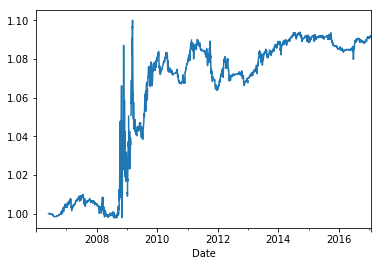

In [99]:
to_index(trade_rets).plot()

In [100]:
vol = trade_rets.rolling(250, 200).std() * np.sqrt(250)

In [101]:
def sharpe(rets, ann = 250):
    return rets.mean() / rets.std() * np.sqrt(ann)

In [102]:
trade_rets.groupby(pd.qcut(vol, 4)).agg(sharpe)

Adj Close
[0.00505, 0.00828]    0.245512
(0.00828, 0.0116]     0.754116
(0.0116, 0.018]       0.326496
(0.018, 0.125]        0.290527
Name: Adj Close, dtype: float64